# Base Model

TF-IDF seemed to be a reasonable base model and already brings quite good performance on this news texts.

In [44]:
import seaborn as sns
from pandas import read_parquet
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

from data import file

In [21]:
data_train = read_parquet(file.news_articles_cleaned_train)
data_test = read_parquet(file.news_articles_cleaned_test)
data_val = read_parquet(file.news_articles_cleaned_val)

In [22]:
from numpy import atleast_1d

def join(tokens):
    return ' '.join(tokens)

labelEncoder = LabelEncoder()
labelEncoder.fit(data_train["label"])

X_train, y_train = data_train.text_tokenized_lemmas.map(join), atleast_1d(
    labelEncoder.transform(data_train["label"])).transpose()
X_test, y_test = data_test.text_tokenized_lemmas.map(join), atleast_1d(
    labelEncoder.transform(data_test["label"])).transpose()
X_val, y_val = data_val.text_tokenized_lemmas.map(join), atleast_1d(
    labelEncoder.transform(data_val["label"])).transpose()

In [26]:
print("train size     :", X_train.shape[0])
print("test size      :", X_test.shape[0])
print("validation size:", X_val.shape[0])

train size     : 7216
test size      : 2062
validation size: 1031


In [27]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("vec", CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ("clf", SGDClassifier())
])
pipe.fit(X_train, y_train)

Pipeline(steps=[('vec', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier())])

# Evaluation

In [53]:
from sklearn.metrics import confusion_matrix
from reporting.evaluation import plot_confusion_matrix
sns.set(rc={'figure.figsize': (10, 10)})

### Training Dataset

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       475
           1       1.00      1.00      1.00       717
           2       1.00      0.99      1.00      1060
           3       1.00      1.00      1.00       381
           4       0.99      1.00      1.00      1174
           5       1.00      1.00      1.00       844
           6       1.00      1.00      1.00      1174
           7       0.99      1.00      1.00       988
           8       1.00      1.00      1.00       403

    accuracy                           1.00      7216
   macro avg       1.00      1.00      1.00      7216
weighted avg       1.00      1.00      1.00      7216



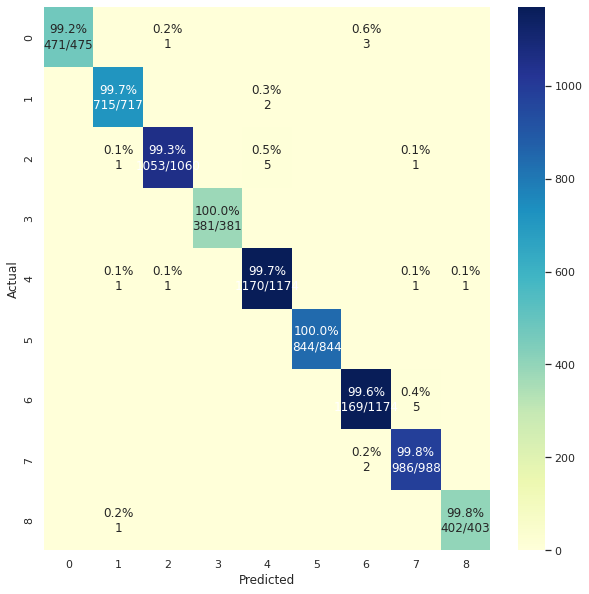

In [55]:
y_train_pred = pipe.predict(X_train)
print(classification_report(y_train, y_train_pred))

plot_confusion_matrix(y_train, y_train_pred)

### Test Dataset

              precision    recall  f1-score   support

           0       0.92      0.81      0.87       135
           1       0.84      0.84      0.84       205
           2       0.86      0.86      0.86       303
           3       0.78      0.86      0.82       109
           4       0.79      0.80      0.80       336
           5       0.99      0.95      0.97       241
           6       0.90      0.90      0.90       336
           7       0.81      0.86      0.83       282
           8       0.92      0.85      0.89       115

    accuracy                           0.86      2062
   macro avg       0.87      0.86      0.86      2062
weighted avg       0.87      0.86      0.86      2062



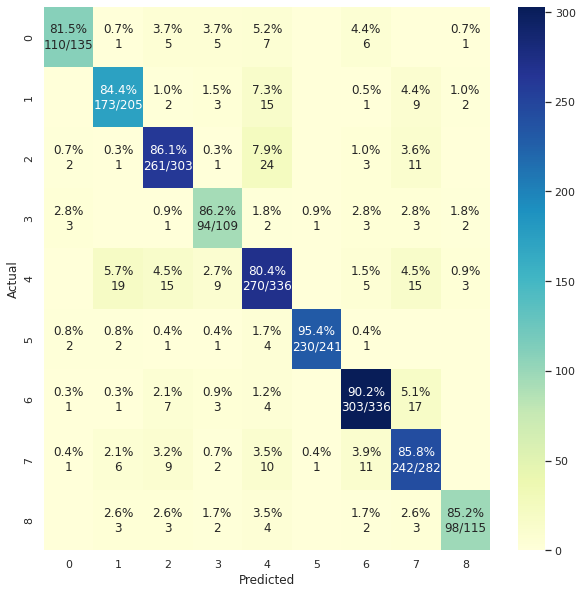

In [56]:
y_test_pred = pipe.predict(X_test)
print(classification_report(y_test, y_test_pred))

plot_confusion_matrix(y_test, y_test_pred)

### Validation Dataset

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        68
           1       0.80      0.80      0.80       103
           2       0.87      0.89      0.88       151
           3       0.84      0.94      0.89        54
           4       0.82      0.87      0.84       168
           5       0.98      0.98      0.98       121
           6       0.93      0.86      0.89       167
           7       0.81      0.82      0.81       141
           8       0.91      0.88      0.89        58

    accuracy                           0.87      1031
   macro avg       0.87      0.87      0.87      1031
weighted avg       0.87      0.87      0.87      1031



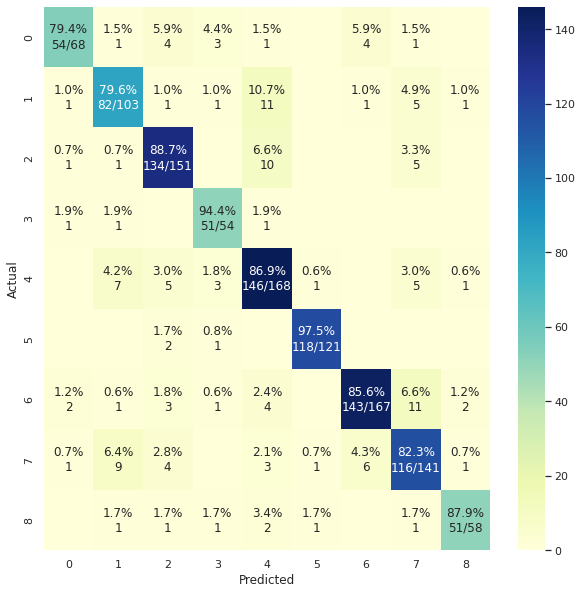

In [57]:
y_val_pred = pipe.predict(X_val)
print(classification_report(y_val, y_val_pred))

plot_confusion_matrix(y_val, y_val_pred)